# **Projeto 1 - Ciência dos Dados**

Nicole Sarvasi Alves da Costa

## **Introdução**
Com o intuito de investigar a efetividade das organizações internacionais, será feita uma análise dos países antes e depois de ingressarem na CSTO, assim como uma análise comparatória dos países membros com países vizinhos ao bloco.

### **Pergunta a ser respondida**
Países que se juntam ao CSTO têm uma diminuição no número de assasinatos?

### **Explicação da hipótese e mecanismo**

#### HIPÓTESE
Após a ingressão no Tratado de Segurança Coletiva (CSTO), há uma diminuição no número de assasinatos dos países membros.

#### MECANISMO
O objetivo principal do CSTO, de acordo com o seu site oficial (https://odkb-csto.org), é prestação de segurança coletiva. Segundo o Ministério de Relações Exteriores da Armênia, algumas medidas tomadas pela organização foram: operações regionais anti-drogas, operações para combater a migração ilegal e o tráfico humano, operações para combater os crimes cibernéticos e as operações para previnir o possivel envolvimento dos cidadãos em atividades terroristas. Com isso, pretendo observar se as providências tomadas pelo CSTO impactaram no número de assasinatos nos países membros.

### Análise dos Dados
Os dados análisados são do periodo de 1900-2016, com foco no início da organização em 1994 e uma década adiante.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Países Membros e Grupo de Controle

Para uma pesquisa mais rebuscada farei a análise temporal dos 6 países membros da CSTO e a análise dos países em comparção  a um grupo de controle composto por países vizinhos.
Abaixo temos toda a relação dos países que pertencem ou não à organização e quais são os países do grupo de controle que usaremos durante toda a análise.

In [32]:
assasinatos_bruto["Membro"]

country
Afghanistan                              Não Membro
Albania                                  Não Membro
Algeria                                  Não Membro
Andorra                                  Não Membro
Angola                                   Não Membro
Antigua and Barbuda                      Não Membro
Argentina                                Não Membro
Armenia                                      Membro
Australia                                Não Membro
Austria                                  Não Membro
Azerbaijan                        Grupo de Controle
Bahamas                                  Não Membro
Bahrain                                  Não Membro
Bangladesh                               Não Membro
Barbados                                 Não Membro
Belarus                                      Membro
Belgium                                  Não Membro
Belize                                   Não Membro
Benin                                    Não Membro
Bhut

Em suma, temos: 

In [33]:
colunamembros.Membro.value_counts()

Não Membro           176
Membro                 6
Grupo de Controle      5
Name: Membro, dtype: int64

# Assasinatos antes e depois da criação da organização

In [34]:
assasinatos_file = "murder_total_deaths.xlsx"
assasinatos_bruto = pd.read_excel(assasinatos_file).set_index('country')
assasinatos_polished = assasinatos_bruto
membros = ['Armenia','Belarus','Kazakhstan','Kyrgyz Republic','Russia','Tajikistan']
membros2 = ['Armenia','Belarus','Kazakhstan','Kyrgyz Republic','Tajikistan']
comparar = ['Georgia','Azerbaijan','Iran','Uzbekistan','Turkmenistan','Afghanistan']
comparar2 = ['Georgia','Azerbaijan','Iran','Uzbekistan','Turkmenistan']

Com a união dos países membros, o CSTO entrou em vigor em 1994. A tabela mostra os números de assassinatos de cada país nos anos anteriores a aliaça:

In [35]:
membros_antes = assasinatos_polished.loc[membros, assasinatos_polished.columns < 1994]
membros_depois = assasinatos_polished.loc[membros, assasinatos_polished.columns >= 1994]
membros_antes

,1990,1991,1992,1993
country,,,,
Armenia,165.0,186.0,201.0,220.0
Belarus,818.0,879.0,978.0,1090.0
Kazakhstan,2040.0,2210.0,2450.0,2720.0
Kyrgyz Republic,415.0,431.0,463.0,500.0
Russia,25400.0,28400.0,34800.0,44500.0
Tajikistan,240.0,292.0,391.0,486.0


Já os números de assassinatos para cada país depois da adesão são:

In [36]:
membros_depois

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Armenia,215.0,205.0,195.0,175.0,164.0,154.0,137.0,129.0,126.0,124.0,...,133.0,135.0,132.0,128.0,126.0,124.0,118.0,114.0,114.0,115.0
Belarus,1160.0,1230.0,1240.0,1280.0,1300.0,1290.0,1260.0,1260.0,1260.0,1200.0,...,988.0,967.0,942.0,909.0,890.0,799.0,732.0,690.0,695.0,702.0
Kazakhstan,2970.0,3130.0,3180.0,3130.0,3050.0,2980.0,2960.0,2960.0,2970.0,3040.0,...,2930.0,2680.0,2450.0,2280.0,2150.0,2020.0,1890.0,1810.0,1790.0,1860.0
Kyrgyz Republic,531.0,529.0,507.0,469.0,445.0,427.0,418.0,403.0,395.0,389.0,...,383.0,378.0,365.0,359.0,350.0,339.0,329.0,322.0,319.0,324.0
Russia,51400.0,51400.0,47700.0,43400.0,42500.0,45100.0,46500.0,45600.0,45100.0,44400.0,...,34400.0,32500.0,29400.0,28000.0,26200.0,24700.0,24000.0,23800.0,24200.0,24600.0
Tajikistan,529.0,547.0,577.0,542.0,493.0,424.0,370.0,328.0,291.0,257.0,...,198.0,197.0,191.0,194.0,192.0,202.0,213.0,223.0,232.0,239.0


In [17]:
membros_antes_2 = membros_antes.T.loc[:,membros2]
membros_depois_2 = membros_depois.T.loc[:,membros2]
grupo_comparacao_antes = assasinatos_polished.loc[comparar, assasinatos_polished.columns < 1994]
grupo_comparacao_depois = assasinatos_polished.loc[comparar, assasinatos_polished.columns >= 1994]
grupo_comparacao_antes_2 = grupo_comparacao_antes.T.loc[:,comparar2]
grupo_comparacao_depois_2 = grupo_comparacao_depois.T.loc[:,comparar2]

In [18]:
membros_antes_2 = membros_antes.T.loc[:,membros2]
membros_depois_2 = membros_depois.T.loc[:,membros2]

# Assasinatos em função do tempo (análise temporal e com o grupo de comparação)

Para melhor poder investigar os dados, plotei gráficos das mortes em função do tempo antes e depois da criação da organização com os países membros e o grupo de comparação.

Text(0, 0.5, 'anos')

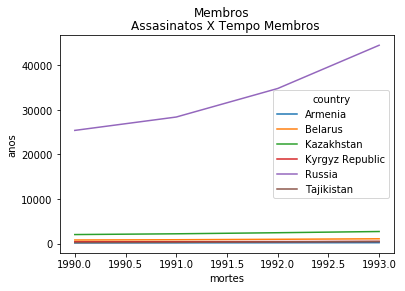

In [19]:
membros_antes.T.plot()
plt.suptitle('Membros')
plt.title('Assasinatos X Tempo Membros ')
plt.xlabel('mortes')
plt.ylabel('anos')


In [ ]:
Abaixo plotei o mesmo gráfico, porém sem a Rússia, para ter uma visão mais ampla do comportamento dos outros países.

Text(0, 0.5, 'anos')

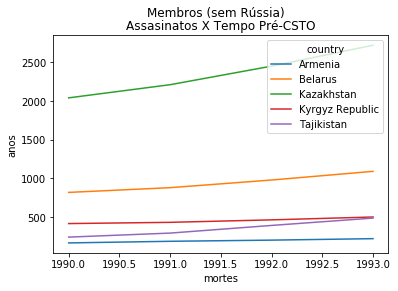

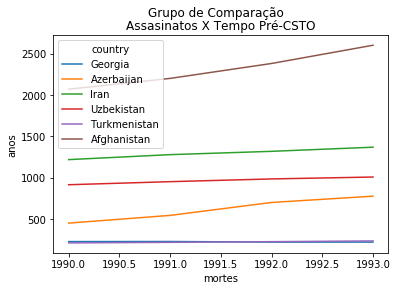

In [37]:
membros_antes_2.plot()
plt.suptitle('Membros (sem Rússia)')
plt.title('Assasinatos X Tempo Pré-CSTO')
plt.xlabel('mortes')
plt.ylabel('anos')

grupo_comparacao_antes.T.plot()
plt.suptitle('Grupo de Comparação')
plt.title('Assasinatos X Tempo Pré-CSTO')
plt.xlabel('mortes')
plt.ylabel('anos')

Para esse projeto, o Afeganistão foi retirado do grupo de comparação, pois como se pode observar no gráfico acima, o número de assasinatos do país se comporta como um outlier, tendo em vista que o país encontra-se constantemente em conflitos internos e externos desde 1978

Text(0, 0.5, 'anos')

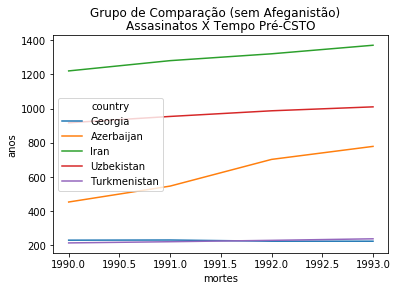

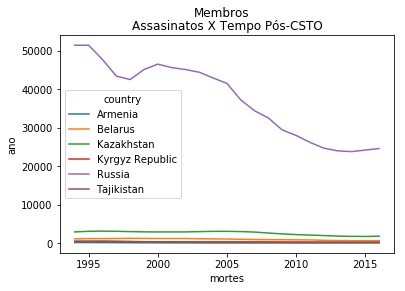

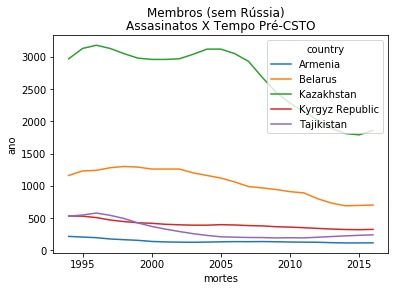

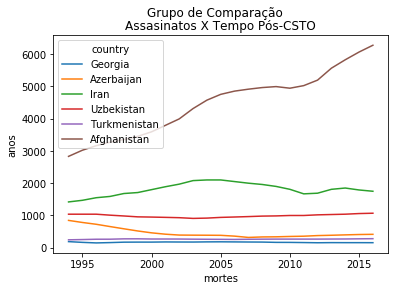

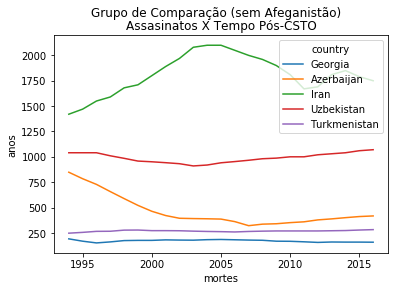

In [39]:
grupo_comparacao_antes_2.plot()
plt.suptitle('Grupo de Comparação (sem Afeganistão)')
plt.title('Assasinatos X Tempo Pré-CSTO')
plt.xlabel('mortes')
plt.ylabel('anos')

membros_depois.T.plot()
plt.suptitle('Membros')
plt.title('Assasinatos X Tempo Pós-CSTO')
plt.xlabel('mortes')
plt.ylabel('ano')
membros_depois_2.plot()
plt.suptitle('Membros (sem Rússia)')
plt.title('Assasinatos X Tempo Pré-CSTO')
plt.xlabel('mortes')
plt.ylabel('ano')


grupo_comparacao_depois.T.plot()
plt.suptitle('Grupo de Comparação')
plt.title('Assasinatos X Tempo Pós-CSTO')
plt.xlabel('mortes')
plt.ylabel('anos')
grupo_comparacao_depois_2.plot()
plt.suptitle('Grupo de Comparação (sem Afeganistão)')
plt.title('Assasinatos X Tempo Pós-CSTO')
plt.xlabel('mortes')
plt.ylabel('anos')

A partir dos gráficos é possível analisar que tendência dos assasinatos nos países membros é crescente antes da ingressão em 1994 e passa a ser decrescente. Já os países de comparação, possuem um número crescente de assasinatos antes de 1994 e após a data da criação do CSTO é evidente a instabilidade dos valores de assasinatos e a falta do seu decaimento.

In [41]:
grupo_comparacao = assasinatos_polished.loc[comparar2, :]
tx_var_comp = grupo_comparacao[2004]/grupo_comparacao[1994]
tx_var_membros = membros_depois[2004]/membros_depois[1994]





Abaixo calculei as taxas de variação média entre os países membros de 1994-2004. Com isso consigo ter um resultado numérico, trazendo credibilidade às minhas validações, tendo em vista que este vai além das investigações feitas pelos gráficos acima.

In [42]:
all_membros_var = membros_depois[2004].sum()/membros_depois[1994].sum()
all_comp_var = grupo_comparacao[2004].sum()/grupo_comparacao[1994].sum()

print(all_membros_var)
print(all_comp_var)

0.8436933368541502
1.0290977042178324


Comparção entre países mebros e o grupo do controle em relação a variação de assassinatos em 1994 e 2004, 10 anos depois da adesão CSTO.

Com esses dados fica explícito que os países que aderiram a CSTO possuíram uma queda de aproximadamente 16% no número de assasinatos no país, enquanto os países de comparação tiveram um aumento de 3%.

# Forças Armadas

In [22]:
forcas_armadas_cru = pd.read_excel("armed_forces_personnel_percent_of_labor_force.xlsx").set_index('country')

In [23]:
forcas_armadas_membros = forcas_armadas_cru.loc[membros,:]

In [24]:
forcas_armadas_comparar = forcas_armadas_cru.loc[comparar2,:]

In [25]:
assasinatos_bruto.loc[:,"Membro"] = "Não Membro"
assasinatos_bruto.loc[membros,"Membro"] = "Membro"
assasinatos_bruto.loc[comparar2,"Membro"] = "Grupo de Controle"
colunamembros = assasinatos_bruto


ValueError: x and y must be the same size

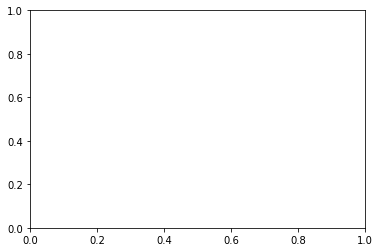

In [26]:
plt.scatter(assasinatos_bruto.loc[membros,:], forcas_armadas_cru.loc[membros, :], color="r")
plt.scatter(assasinatos_bruto.loc[comparar2,:], forcas_armadas_cru.loc[comparar2, :], color="b")

In [7]:
plt.scatter(assasinatos_bruto.loc[membros,2004], forcas_armadas_cru.loc[membros, 2004], color="r")
plt.scatter(assasinatos_bruto.loc[comparar2,2004], forcas_armadas_cru.loc[comparar2, 2004], color="b")

NameError: name 'assasinatos_bruto' is not defined

## Bases de Dados Usadas

Serviço Diplomático da Bielorrúsia: (http://mfa.gov.by/en/organizations/membership/list/cddd96a3f70190b1.html)

Ministério de Relações Exteriores da República da Armênia:(https://www.mfa.am/en/international-organisations/1)

Site Oficial da Organização do Tratado de Segurança Coletiva: (https://odkb-csto.org) 

GapMinder: (https://www.gapminder.org)

## Análise de Dados

## Conclusão

Ao observar o comportamento dos países do bloco após a sua formação, pode-se concluir que as medidas tomadas pelo CSTO impactaram.